In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.preprocessing import normalize
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV


In [16]:
df = pd.read_csv("..//dataset//processed//final_dataset.csv")
df

,year,month,day,hour,DE_wind_generation_actual,DE_wind_capacity,DE_wind_speed,DE_temperature,DE_air_density
0,2015,1,1,0,8852.0,27913.0,2.307,-0.895,1.275
1,2015,1,1,1,9054.0,27913.0,2.347,-0.971,1.276
2,2015,1,1,2,9070.0,27913.0,2.394,-1.041,1.276
3,2015,1,1,3,9163.0,27913.0,2.396,-1.097,1.277
4,2015,1,1,4,9231.0,27913.0,2.420,-1.153,1.277
...,...,...,...,...,...,...,...,...,...
43819,2019,12,31,19,8875.0,50452.0,1.808,0.751,1.265
43820,2019,12,31,20,7652.0,50452.0,1.828,0.651,1.267
43821,2019,12,31,21,7283.0,50452.0,1.850,0.501,1.269
43822,2019,12,31,22,6573.0,50452.0,1.814,0.297,1.270


In [17]:
# for lag in [1, 2, 3]:
#     df[f'lag_{lag}'] = df['DE_wind_generation_actual'].shift(lag)

# # Drop NaN values caused by shifting
# df = df.dropna()

In [18]:
train_df = df[df['year']<=2018]
test_df = df[df['year']>2018]

In [19]:
# train_df = train_df.drop(columns=['lag_1'], inplace= True)
train_df

,year,month,day,hour,DE_wind_generation_actual,DE_wind_capacity,DE_wind_speed,DE_temperature,DE_air_density
0,2015,1,1,0,8852.0,27913.0,2.307,-0.895,1.275
1,2015,1,1,1,9054.0,27913.0,2.347,-0.971,1.276
2,2015,1,1,2,9070.0,27913.0,2.394,-1.041,1.276
3,2015,1,1,3,9163.0,27913.0,2.396,-1.097,1.277
4,2015,1,1,4,9231.0,27913.0,2.420,-1.153,1.277
...,...,...,...,...,...,...,...,...,...
35059,2018,12,31,19,17587.0,48974.0,2.415,4.623,1.246
35060,2018,12,31,20,18871.0,48974.0,2.654,4.705,1.246
35061,2018,12,31,21,20270.0,48974.0,2.854,4.741,1.245
35062,2018,12,31,22,21405.0,48974.0,3.036,4.718,1.245


In [20]:
features = ['year','month','day','hour','DE_wind_capacity', 'DE_wind_speed', 'DE_temperature', 'DE_air_density']
target = 'DE_wind_generation_actual'

In [21]:
X_train,y_train = train_df[features], train_df[target]
X_test,y_test = test_df[features],test_df[target]

In [22]:
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

In [23]:
model = XGBRegressor(objective="reg:squarederror", n_estimators=185, learning_rate=0.03, early_stopping_rounds=10)
model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],  # <- Only use validation data
    verbose=True
)
print("fitted xgb")

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test,y_pred)
r2 = model.score(X_test, y_test)

[0]	validation_0-rmse:10371.27427
[1]	validation_0-rmse:10155.24375
[2]	validation_0-rmse:9940.30496
[3]	validation_0-rmse:9731.44450
[4]	validation_0-rmse:9527.66527
[5]	validation_0-rmse:9317.40076
[6]	validation_0-rmse:9128.00113
[7]	validation_0-rmse:8942.15754
[8]	validation_0-rmse:8774.38991
[9]	validation_0-rmse:8596.67091
[10]	validation_0-rmse:8427.75444
[11]	validation_0-rmse:8262.56473
[12]	validation_0-rmse:8113.34655
[13]	validation_0-rmse:7960.06700
[14]	validation_0-rmse:7818.24051
[15]	validation_0-rmse:7684.46966
[16]	validation_0-rmse:7548.61827
[17]	validation_0-rmse:7411.16484


[18]	validation_0-rmse:7287.50145
[19]	validation_0-rmse:7170.64354
[20]	validation_0-rmse:7053.43659
[21]	validation_0-rmse:6940.69557
[22]	validation_0-rmse:6837.81157
[23]	validation_0-rmse:6741.65093
[24]	validation_0-rmse:6637.21317
[25]	validation_0-rmse:6540.51408
[26]	validation_0-rmse:6452.70149
[27]	validation_0-rmse:6367.88412
[28]	validation_0-rmse:6270.94032
[29]	validation_0-rmse:6173.75913
[30]	validation_0-rmse:6095.06017
[31]	validation_0-rmse:6010.26123
[32]	validation_0-rmse:5924.36512
[33]	validation_0-rmse:5862.04451
[34]	validation_0-rmse:5793.45898
[35]	validation_0-rmse:5724.92375
[36]	validation_0-rmse:5655.22260
[37]	validation_0-rmse:5588.94118
[38]	validation_0-rmse:5528.77885
[39]	validation_0-rmse:5468.45225
[40]	validation_0-rmse:5411.65522
[41]	validation_0-rmse:5358.41019
[42]	validation_0-rmse:5305.86567
[43]	validation_0-rmse:5251.19867
[44]	validation_0-rmse:5209.46000
[45]	validation_0-rmse:5154.41960
[46]	validation_0-rmse:5111.95922
[47]	validatio

In [10]:
y_train_pred = model.predict(X_train)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

# print(f"Train RMSE: {rmse_train}")
print(f"Train RMSE: {rmse_train}")
print(f"Test RMSE: {rmse_test}")


Train RMSE: 2287.164532145779
Test RMSE: 4098.9081000307715


if train rmse smaller than test rmse we can have some overfitting

In [24]:
print(r2)
print(rmse)
print(mae)
model.get_params

0.8295688530890284
4098.9081000307715
3180.374352024026


<bound method XGBModel.get_params of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=10,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.03, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=185,
             n_jobs=None, num_parallel_tree=None, ...)>

## normal model , default params

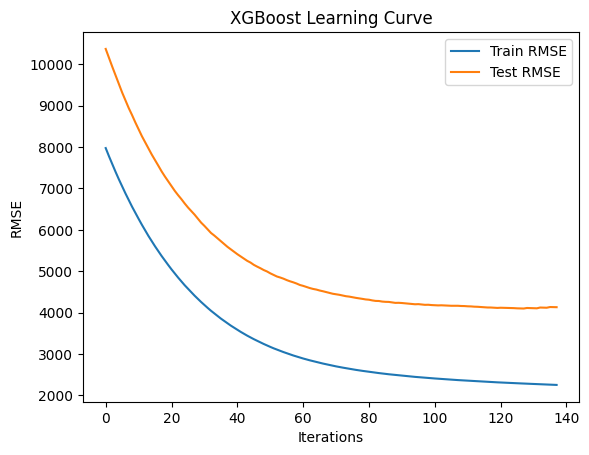

In [25]:
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train, eval_set=eval_set, verbose=False)
results = model.evals_result()
epochs = len(results["validation_0"]["rmse"])

plt.plot(range(epochs), results["validation_0"]["rmse"], label="Train RMSE")
plt.plot(range(epochs), results["validation_1"]["rmse"], label="Test RMSE")
plt.xlabel("Iterations")
plt.ylabel("RMSE")
plt.legend()
plt.title("XGBoost Learning Curve")
plt.show()


C:\Users\ursal\AppData\Local\Temp\ipykernel_37584\1782917950.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_importance_df, palette="viridis")


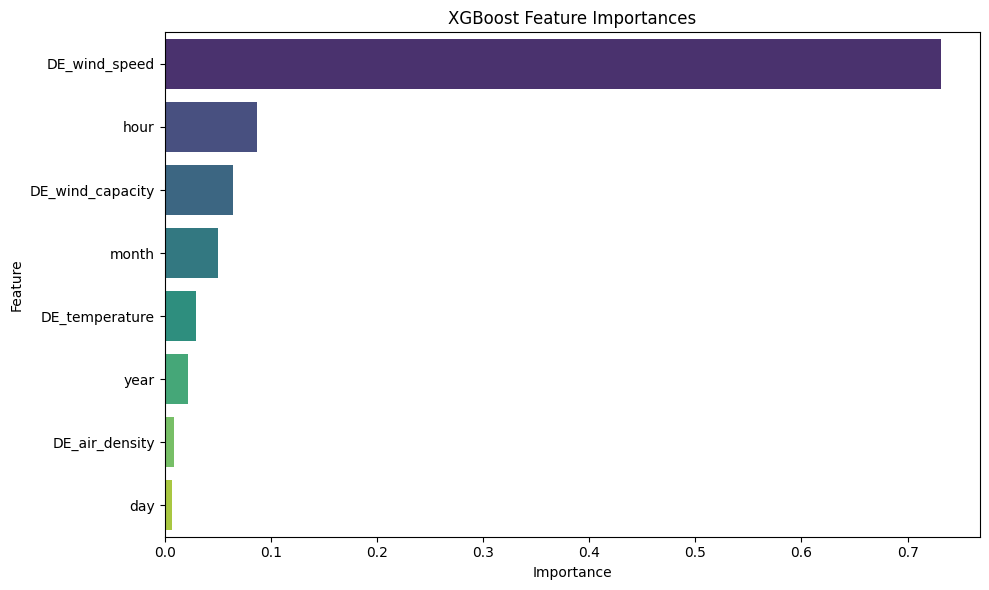

[0.02155368 0.05018728 0.00673616 0.08669655 0.06455206 0.7316582
 0.02977773 0.00883831]


In [26]:
import seaborn as sns

# Get feature importances
importances = model.feature_importances_
feat_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_importance_df, palette="viridis")
plt.title('XGBoost Feature Importances')
plt.tight_layout()
plt.show()

print(importances)

## randomized search cv params model

In [27]:
from sklearn.model_selection import RandomizedSearchCV

xgb1 = XGBRegressor(objective='reg:squarederror', verbosity=0)

param_dist = {
    'learning_rate': [0.01, 0.03, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3],
    'subsample': [0.6, 0.8],
    'colsample_bytree': [0.6, 0.8],
    'n_estimators': [100, 200, 300],
    'gamma': [0, 0.1],
    'reg_lambda': [0.1, 1],
    'reg_alpha': [0, 0.1]
}

random_search = RandomizedSearchCV(
    estimator=xgb1,
    param_distributions=param_dist,
    n_iter=20,  # Try 20 random combos
    scoring='neg_mean_squared_error',
    n_jobs=4,
    cv=3,
    verbose=1,
    random_state=42
)

random_search.fit(X_train, y_train)
print("Best parameters:", random_search.best_params_)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best parameters: {'subsample': 0.6, 'reg_lambda': 1, 'reg_alpha': 0, 'n_estimators': 200, 'min_child_weight': 3, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.6}


In [28]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = random_search.predict(X_test)

mse2 = mean_squared_error(y_test, y_pred)
mae2 = mean_absolute_error(y_test,y_pred)

rmse2 = np.sqrt(mse2)  # Root Mean Squared Error

# Compute R² Score
r22 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse2:.4f}")
print(f"Mean Absolute Error (MSE): {mae2:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse2:.4f}")
print(f"R² Score: {r22:.4f}")

Mean Squared Error (MSE): 25074208.8082
Mean Absolute Error (MSE): 3923.3370
Root Mean Squared Error (RMSE): 5007.4154
R² Score: 0.7456


c:\Users\ursal\Desktop\notebooks_licenta\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


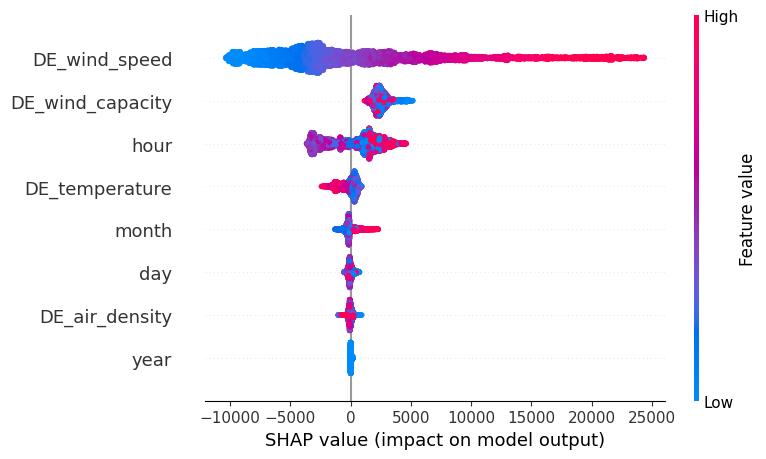

In [17]:
import shap

explainer = shap.Explainer(model)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test, feature_names=features)


# grid search too long time

In [15]:
# xgb1 = XGBRegressor(objective = 'reg:squarederror', verbosity = 0)
# parameters = { #when use hyperthread, xgboost may become slower
#                 'learning_rate': [0.01, 0.03, 0.05, 0.1],  # Lower values for better generalization
#                 'max_depth': [3, 5, 7, 9],  # Avoid too deep trees
#                 'min_child_weight': [1, 3, 5],  # Regularization effect
#                 'subsample': [0.6, 0.8, 1.0],  # Try different data fractions
#                 'colsample_bytree': [0.6, 0.8, 1.0],  # Feature sampling
#                 'n_estimators': [100, 300, 500],  # More estimators for better results
#                 'gamma': [0, 0.1, 0.2],  # Controls tree pruning
#                 'reg_lambda': [0.1, 1, 10],  # L2 regularization
#                 'reg_alpha': [0, 0.1, 1]  # L1 regularization
# }

# xgb_grid = GridSearchCV(estimator=xgb1,
#                         param_grid = parameters,
#                         cv = 2,
#                         n_jobs = 4,
#                         verbose=True,
#                         scoring='neg_mean_squared_error'
#                         )

# xgb_grid.fit(X_train_scaled, y_train)
# print("fitted xgb")

# y_pred = xgb_grid.predict(X_test_scaled)

# rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# r2 = xgb_grid.score(X_test_scaled, y_test)


In [ ]:
test_df['predicted_wind_generation'] = model.predict(X_test)